In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
#load mnist data
def load_data():
  (X_train, y_train), (X_test, y_test) = mnist.load_data()

  #normalize
  X_train = X_train.astype('float32') / 255.0
  X_test = X_test.astype('float32') / 255.0

  #flatten images into 1-D vectors
  X_train = X_train.reshape((X_train.shape[0], -1))
  X_test = X_test.reshape((X_test.shape[0], -1))

  #convert output into one-hot encoded
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  return X_train, y_train, X_test, y_test

In [3]:
# X_train, y_train, X_test, y_test = load_data()

In [4]:
# y_train.shape

In [5]:
def initialize_parameters(input_size, hidden_size, output_size):
  np.random.seed(1)
  W1 = np.random.randn(input_size, hidden_size) * 0.01
  b1 = np.zeros((1, hidden_size))
  W2 = np.random.randn(hidden_size, output_size) * 0.01
  b2 = np.zeros((1, output_size))
  return W1, b1, W2, b2

In [6]:
# activation functions

def relu(z):
  return np.maximum(0, z)

def relu_derivative(z):
  return (z>0).astype(int)

def softmax(z):
  exp_z = np.exp(z)
  return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [7]:
def forward_propagation(X, W1, b1, W2, b2):
  Z1 = np.dot(X, W1) + b1
  A1 = relu(Z1)
  Z2 = np.dot(A1, W2) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

In [8]:
def cost_function(y,y_hat):
  y_hat = y_hat+1e-10 #to prevent log 0
  loss = -np.sum(y*np.log(y_hat))
  cost = np.mean(loss)
  return cost

In [9]:
def backward_propagation(X, W1,W2,A1,A2,Z1,Y):

  m = X.shape[0]

  dZ2 = A2 - Y
  dW2 = np.dot(A1.T, dZ2) / m
  db2 = np.sum(dZ2, axis=0, keepdims=True) / m

  dA1 = np.dot(dZ2, W2.T)
  dZ1 = dA1 * relu_derivative(Z1)
  dW1 = np.dot(X.T, dZ1) / m
  db1 = np.sum(dZ1, axis=0, keepdims=True) / m

  return dW1, db1, dW2, db2


In [10]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
  W1 = W1 - learning_rate * dW1
  b1 = b1 - learning_rate * db1
  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2

  return W1, b1, W2, b2

In [11]:
def accuracy(y,y_hat): # Y=y and y_hat = A2
  pred = np.argmax(y_hat,axis=1)
  actual = np.argmax(y,axis=1)
  return np.mean(pred==actual)

In [12]:
def model(X_train, y_train, input_size, hidden_size, output_size, num_iterations, learning_rate):

  #initialize parameters
  W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

  #train
  for i in range(0,num_iterations+1):
    #forward prop
    Z1, A1, Z2, A2 = forward_propagation(X_train, W1, b1, W2, b2)

    #compute cost
    cost = cost_function(y_train, A2)

    #backward prop
    dW1, db1, dW2, db2 = backward_propagation(X_train, W1, W2, A1, A2, Z1, y_train)

    #update params
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

    #print cost and accuracy


    if i % 100 == 0:
      acc = accuracy(y_train, A2)
      print(f"Iteration: {i}, Cost: {cost} - accuracy: {acc* 100:.3f}%")

  return W1, b1, W2, b2



In [13]:
#load data
X_train, y_train, X_test, y_test = load_data()

#initialize inputs

input_size = X_train.shape[1]
output_size = 10
hidden_size = 128
num_iterations = 1000
learning_rate = 0.1

In [14]:
#train model and see accuracy
W1,b1,W2,b2 = model(X_train, y_train, input_size,hidden_size, output_size, num_iterations, learning_rate)


Iteration: 0, Cost: 138114.3915716559 - accuracy: 13.855%
Iteration: 100, Cost: 55820.096550885864 - accuracy: 79.282%
Iteration: 200, Cost: 30044.093933808694 - accuracy: 86.938%
Iteration: 300, Cost: 24187.995607695284 - accuracy: 88.952%
Iteration: 400, Cost: 21637.401786610964 - accuracy: 89.923%
Iteration: 500, Cost: 20114.07308533426 - accuracy: 90.530%
Iteration: 600, Cost: 19021.428371356953 - accuracy: 91.003%
Iteration: 700, Cost: 18146.552195769018 - accuracy: 91.398%
Iteration: 800, Cost: 17395.837414235702 - accuracy: 91.783%
Iteration: 900, Cost: 16727.977477003966 - accuracy: 92.088%


In [25]:
def test_set_accuracy(X_test, y_test, W1, b1, W2, b2):
    _,_,_,A2_test = forward_propagation(X_test, W1, b1, W2, b2)
    A2_test = np.argmax(A2_test, axis=1)
    y_test = np.argmax(y_test, axis=1)
    test_accuracy = np.mean(A2_test == y_test)
    return A2_test,test_accuracy


#print test_set_accuracy
A2_test,test_acc = test_set_accuracy(X_test, y_test,W1, b1, W2, b2)
print(f"Final Test Accuracy: { test_acc* 100:.3f}%")

Final Test Accuracy: 92.770%


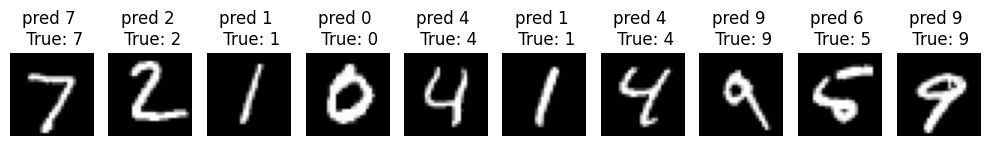

In [26]:
num_examples = 10
plt.figure(figsize=(10, 5))

for i in range(num_examples):
    plt.subplot(2, num_examples, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"pred {A2_test[i]} \n True: {np.argmax(y_test[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()